#  Scaling Exercises

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from wrangle import wrangle_telco

warnings.filterwarnings('ignore')

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [4]:
# Create a function to split the telco_churn data into train, validate, and test sets.
def split_data(df):
    '''
    Accepts the telco_churn dataset.
    Returns the telco_churn split into train, validate, and test sets.
    '''
    train_validate, test = train_test_split(df, test_size=.15)
    train, validate = train_test_split(train_validate, test_size=.15)
    return train, validate, test

## 1.
> Apply the scalers we talked about in this lesson to your data and visualize the results.
1. Linear Scalers
1. Non-linear Scalers

In [5]:
# Thank you Zach. This is a beautiful function.

def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    '''
    
    '''
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]),
                     columns=new_column_names,
                     index=train.index)
                      ],
        axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                     columns=new_column_names,
                     index=validate.index),
                         ],
        axis=1)
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]),
                     columns=new_column_names,
                     index=test.index),
                     ],
        axis=1)
    
    return train, validate, test

In [9]:
train, test, validate = split_data(df)

<br>
<br>

# Linear Scalers
---
1. `StandardScaler()`
1. `MinMaxScaler()`
1. `RobustScaler()`

In [10]:
# Creating a separate list of columns that need to be scaled
# This is incredibly useful in practice!
columns_to_scale = ['tenure', 'monthly_charges', 'total_charges']

##  `StandardScaler()`

In [11]:
scaler = StandardScaler()

In [12]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

In [13]:
# Initialize filter to visualize only scaled attributes
# DO NOT USE WITH NON-LINEAR TRANSFORMERS! ONLY LINEAR TRANSFORMERS
data_to_visualize = train_scaled.drop(columns=columns_to_scale)

In [14]:
train_scaled.describe()

,tenure,monthly_charges,total_charges,tenure_scaled,monthly_charges_scaled,total_charges_scaled
count,1224.000000,1224.000000,1224.000000,1.224000e+03,1.224000e+03,1.224000e+03
mean,56.482026,60.181373,3661.344077,1.883932e-16,1.723385e-17,-2.127927e-16
std,18.178852,34.695468,2571.327989,1.000409e+00,1.000409e+00,1.000409e+00
min,0.000000,18.800000,0.000000,-3.108288e+00,-1.193190e+00,-1.424494e+00
25%,47.750000,23.937500,1248.975000,-4.805361e-01,-1.045055e+00,-9.385637e-01
50%,64.000000,63.400000,3514.075000,4.137251e-01,9.280587e-02,-5.729696e-02
75%,71.000000,89.912500,5980.825000,7.989453e-01,8.572670e-01,9.024244e-01
max,72.000000,118.750000,8672.450000,8.539768e-01,1.688767e+00,1.949636e+00


Training Data Scaled using StandardScaler


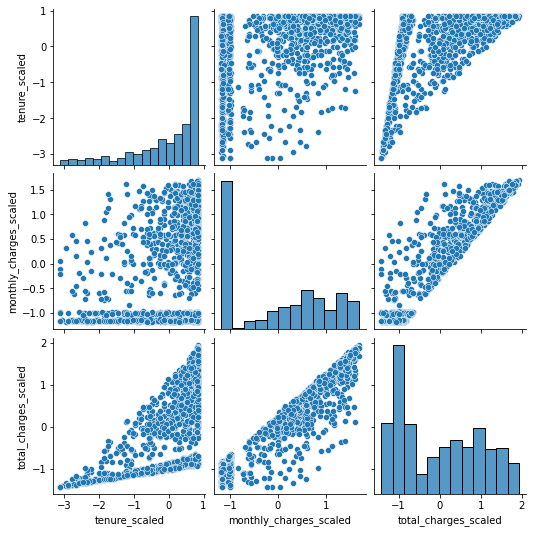

In [15]:
print("Training Data Scaled using StandardScaler")
sns.pairplot(data_to_visualize);

<br>
<br>

##  `MinMaxScaler()`

In [16]:
scaler = MinMaxScaler()

In [17]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

In [18]:
train_scaled.describe()

,tenure,monthly_charges,total_charges,tenure_scaled,monthly_charges_scaled,total_charges_scaled
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,56.482026,60.181373,3661.344077,0.784473,0.414021,0.422181
std,18.178852,34.695468,2571.327989,0.252484,0.347128,0.296494
min,0.000000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,23.937500,1248.975000,0.663194,0.051401,0.144016
50%,64.000000,63.400000,3514.075000,0.888889,0.446223,0.405200
75%,71.000000,89.912500,5980.825000,0.986111,0.711481,0.689635
max,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000


Training Data Scaled using MinMaxScaler


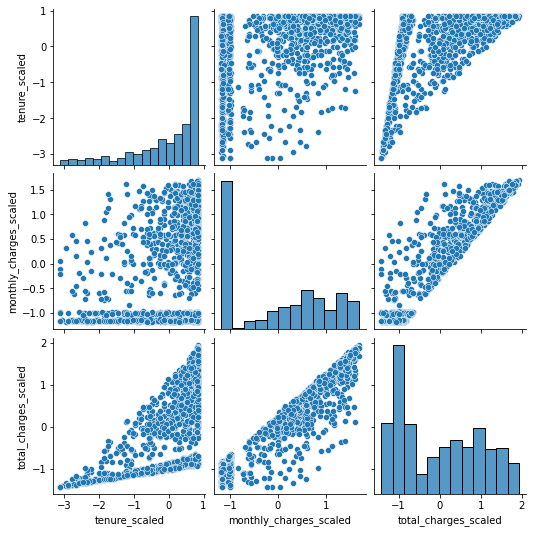

In [19]:
print("Training Data Scaled using MinMaxScaler")
sns.pairplot(data_to_visualize);

<br>
<br>

## `RobustScaler()`

In [20]:
scaler = RobustScaler()

In [21]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

In [22]:
train_scaled.describe()

,tenure,monthly_charges,total_charges,tenure_scaled,monthly_charges_scaled,total_charges_scaled
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1.224000e+03
mean,56.482026,60.181373,3661.344077,-0.323354,-0.048786,3.112294e-02
std,18.178852,34.695468,2571.327989,0.781886,0.525888,5.434086e-01
min,0.000000,18.800000,0.000000,-2.752688,-0.676014,-7.426429e-01
25%,47.750000,23.937500,1248.975000,-0.698925,-0.598143,-4.786923e-01
50%,64.000000,63.400000,3514.075000,0.000000,0.000000,4.805726e-17
75%,71.000000,89.912500,5980.825000,0.301075,0.401857,5.213077e-01
max,72.000000,118.750000,8672.450000,0.344086,0.838954,1.090139e+00


Training Data Scaled using RobustScaler()


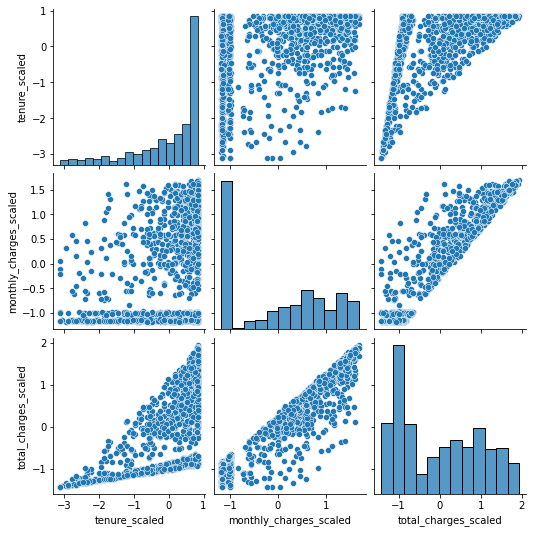

In [23]:
print("Training Data Scaled using RobustScaler()")
sns.pairplot(data_to_visualize);

<br>
<br>
<br>
<br>
<br>

# Non-linear Scalers

1. `QuantileTransformer()`
1. `PowerTransformer()`


## `QuantileTransformer()`

In [24]:
scaler = QuantileTransformer(output_distribution='normal')

In [25]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

In [26]:
train_scaled.describe()

,tenure,monthly_charges,total_charges,tenure_scaled,monthly_charges_scaled,total_charges_scaled
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,56.482026,60.181373,3661.344077,0.696870,-0.001495,-0.011808
std,18.178852,34.695468,2571.327989,2.302568,1.023183,1.061390
min,0.000000,18.800000,0.000000,-5.199338,-5.199338,-5.199338
25%,47.750000,23.937500,1248.975000,-0.664809,-0.674616,-0.674577
50%,64.000000,63.400000,3514.075000,0.003764,0.000115,-0.000161
75%,71.000000,89.912500,5980.825000,0.741388,0.673112,0.674222
max,72.000000,118.750000,8672.450000,5.199338,5.199338,5.199338


Training Data Scaled using QuantileTransformer()


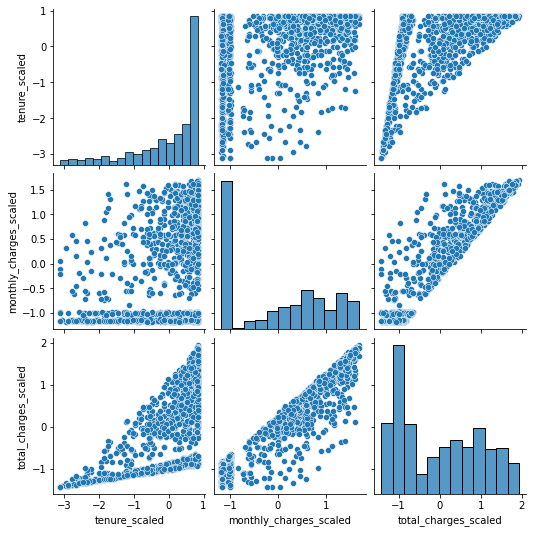

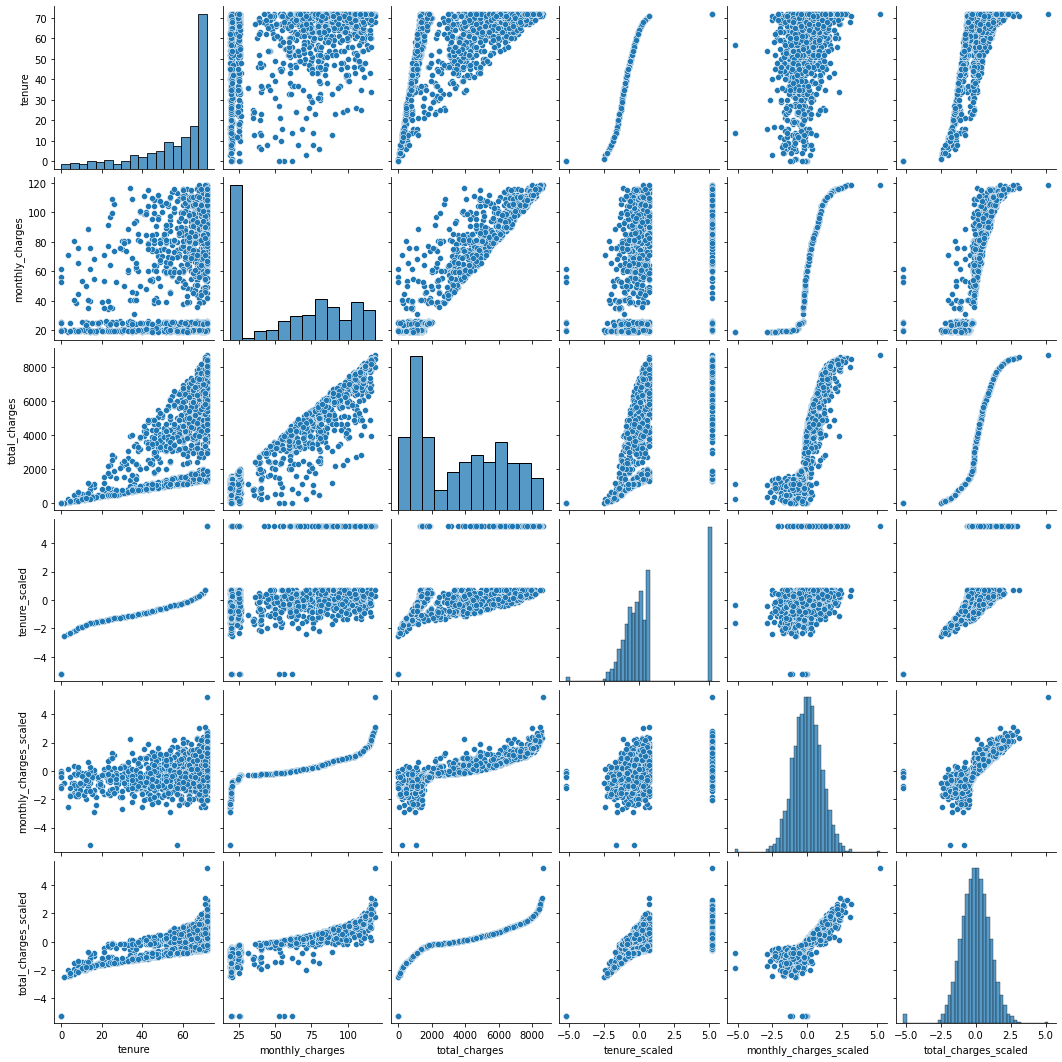

In [27]:
print("Training Data Scaled using QuantileTransformer()")
sns.pairplot(data_to_visualize)

sns.pairplot(train_scaled);

# `PowerTransformer()`

In [28]:
scaler = PowerTransformer(method='yeo-johnson')

In [29]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

In [30]:
train_scaled.describe()

,tenure,monthly_charges,total_charges,tenure_scaled,monthly_charges_scaled,total_charges_scaled
count,1224.000000,1224.000000,1224.000000,1.224000e+03,1.224000e+03,1.224000e+03
mean,56.482026,60.181373,3661.344077,-1.164646e-16,2.989620e-16,4.698493e-17
std,18.178852,34.695468,2571.327989,1.000409e+00,1.000409e+00,1.000409e+00
min,0.000000,18.800000,0.000000,-2.065176e+00,-1.323412e+00,-2.496265e+00
25%,47.750000,23.937500,1248.975000,-7.780957e-01,-1.055733e+00,-8.614958e-01
50%,64.000000,63.400000,3514.075000,3.360170e-01,2.878958e-01,1.665647e-01
75%,71.000000,89.912500,5980.825000,9.320628e-01,8.907440e-01,9.176911e-01
max,72.000000,118.750000,8672.450000,1.023038e+00,1.424500e+00,1.562240e+00


Training Data Scaled using PowerTransformer()


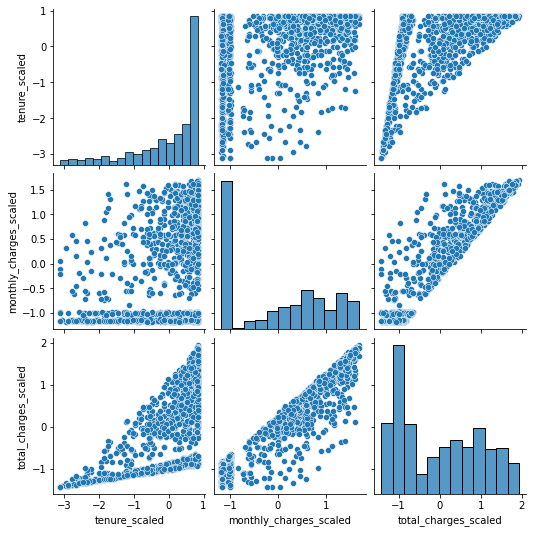

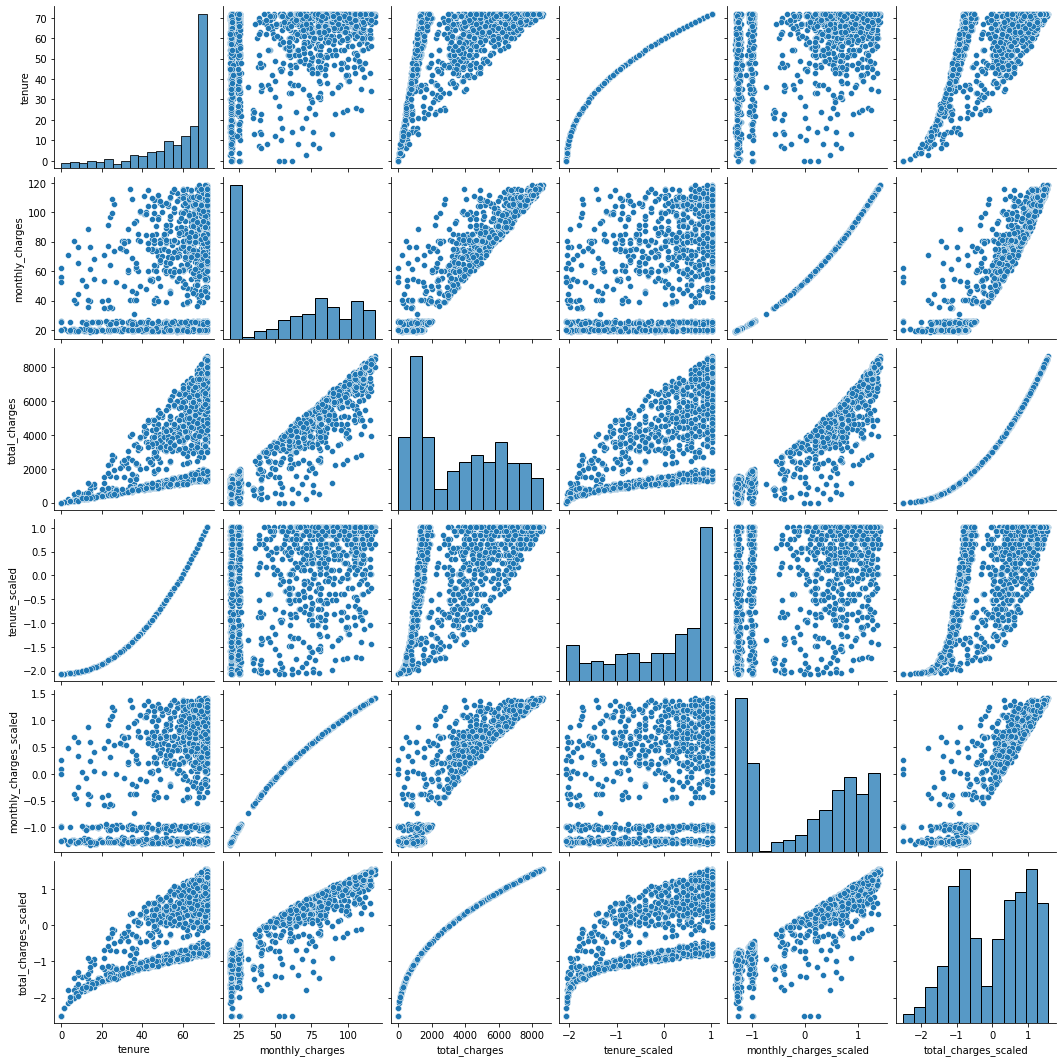

In [31]:
print("Training Data Scaled using PowerTransformer()")
sns.pairplot(data_to_visualize)

sns.pairplot(train_scaled);

## 2.
> Apply the `.inverse_transform()` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [32]:
train_inverse = scaler.inverse_transform(train_scaled[columns_to_scale])

In [39]:
(train[columns_to_scale] == train_inverse).sum()

tenure             0
monthly_charges    0
total_charges      0
dtype: int64

## 3.
> Read the documentation for sklearn's `QuantileTransformer()`. Use `"normal"` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

In [33]:
scaler = QuantileTransformer(output_distribution='normal')

train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

Training Data Scaled using QuantileTransformer()


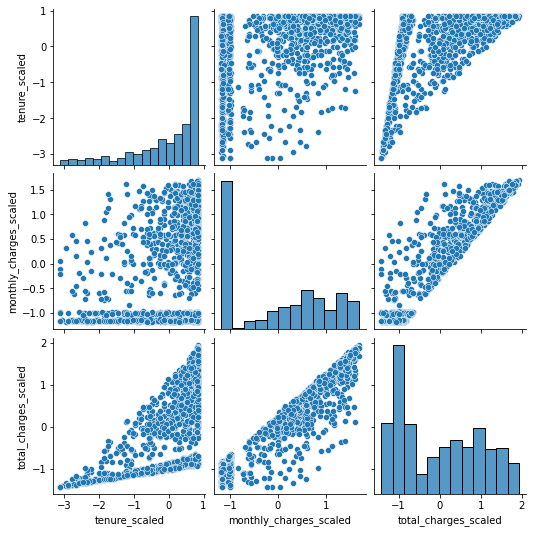

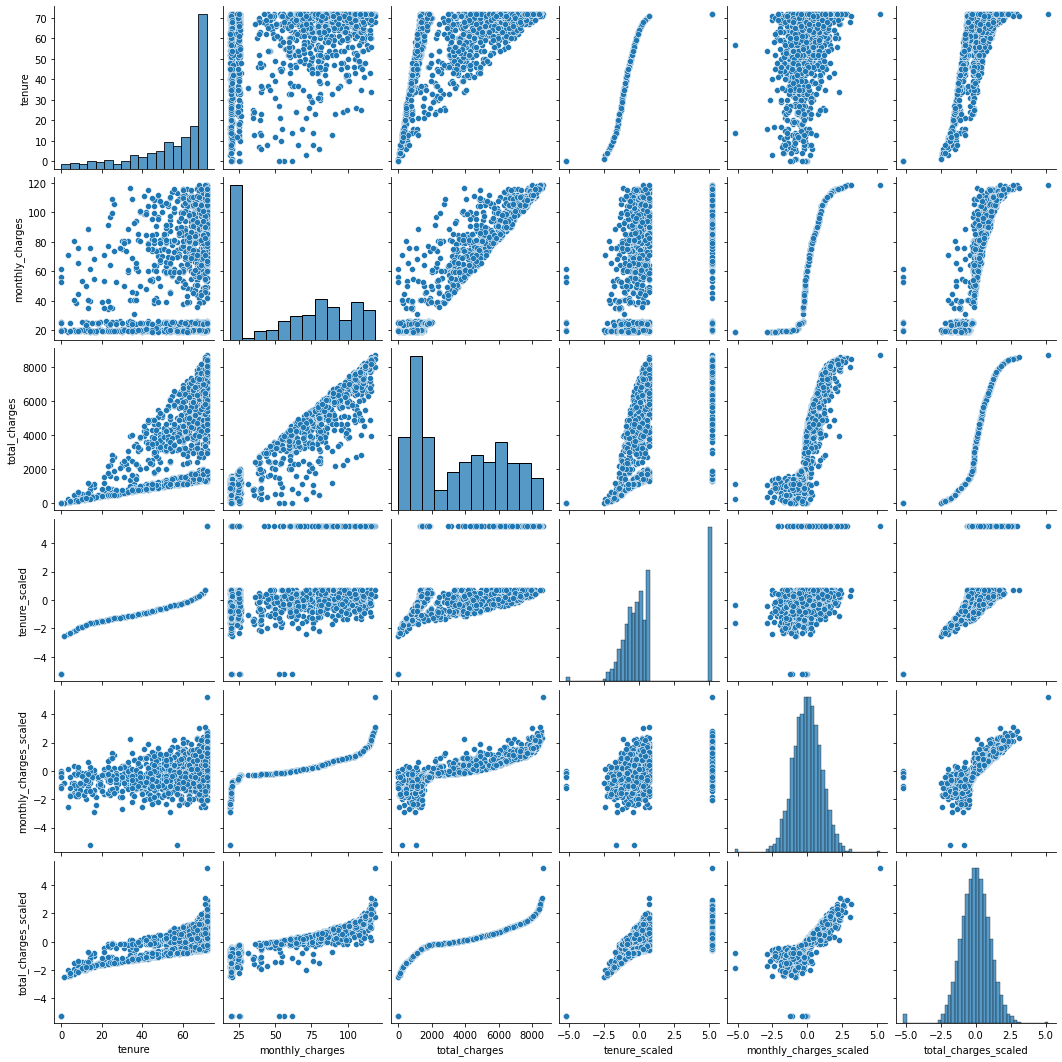

In [34]:
print("Training Data Scaled using QuantileTransformer()")
sns.pairplot(data_to_visualize)

sns.pairplot(train_scaled);

## 4.
> Use the `QuantileTransformer()`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

In [35]:
scaler = QuantileTransformer()

train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,
                                                                validate,
                                                                test,
                                                                scaler,
                                                                columns_to_scale
                                                               )

Training Data Scaled using QuantileTransformer()


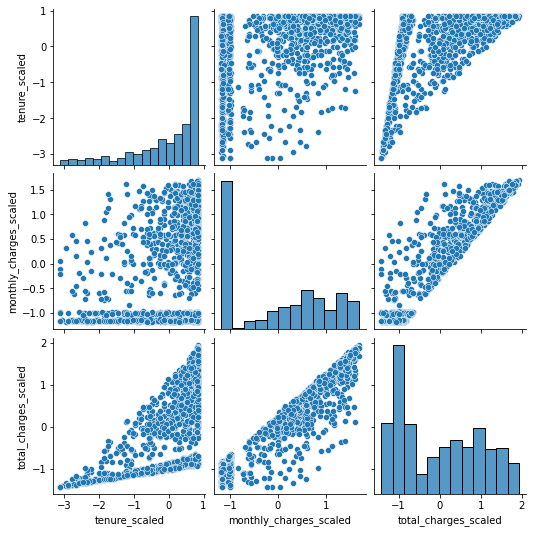

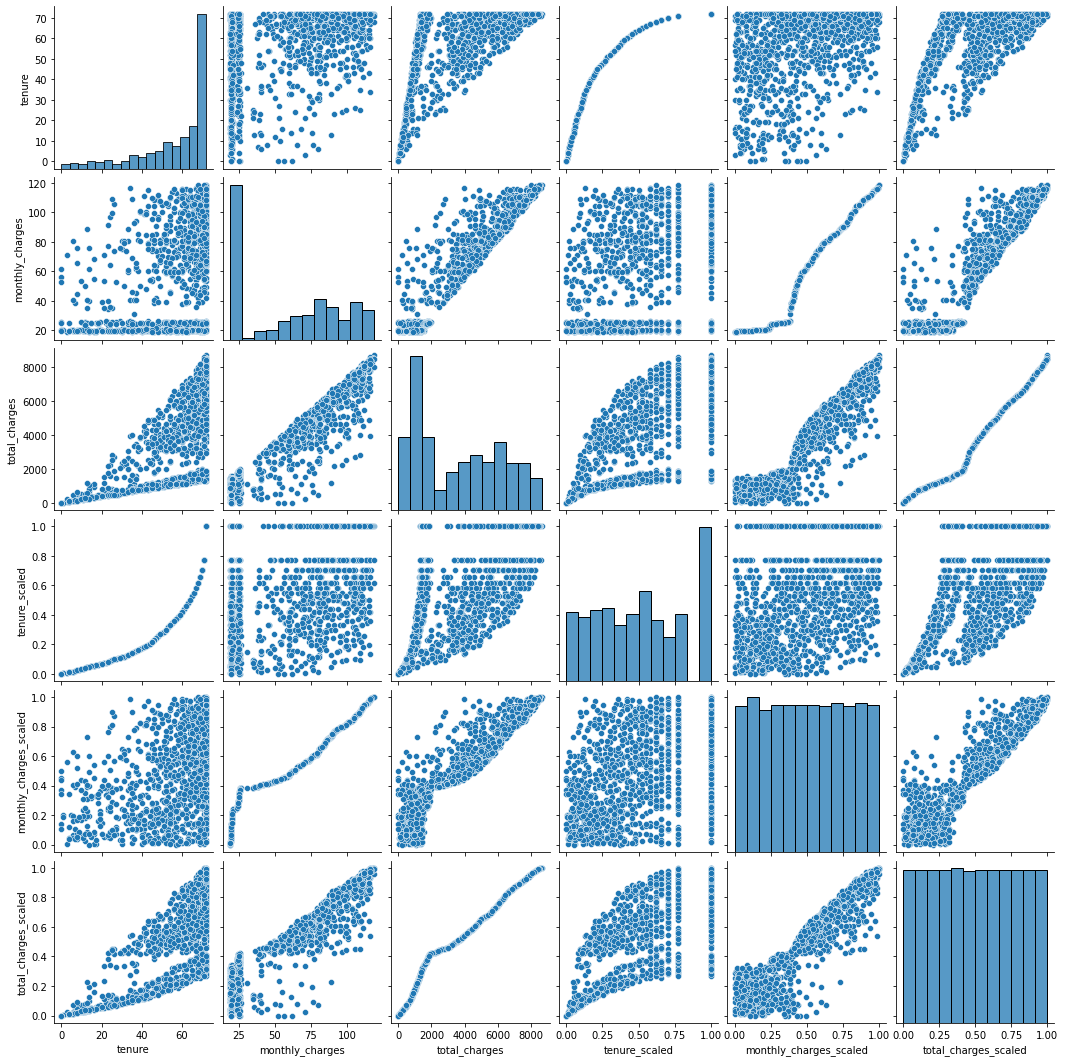

In [40]:
# Uses a Uniform distribution with a ranking system

print("Training Data Scaled using QuantileTransformer()")
sns.pairplot(data_to_visualize)

sns.pairplot(train_scaled);

## 5.
>Based on the work you've done, choose a scaling method for your dataset.

I choose to use `MinMaxScaler()` and `QuantileTransformer()`

## 6.
> Write a function within your `prepare.py` that accepts:
>
> Input the train, validate, and test data splits
>
> Returns the scaled versions of each.

<strong>Be sure to only learn the parameters for scaling from your training data!</strong>